In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

In [2]:
clients = [0, 0, 0, 0, 0, 
           1, 1, 1, 1, 1]
first_model_pred = [0, 0, 1, 1, 1,
                    1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0]


df = pd.DataFrame({
    'clients': clients,
    'first_model': first_model_pred,
    'second_model': second_model_pred
})

df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


In [3]:
# Посмотрим правильность работы моделей
df['first_model_right'] = df['clients'] == df['first_model']
df['second_model_right'] = df['clients'] == df['second_model']

In [8]:
from sklearn.metrics import precision_score, recall_score

precision_1 = precision_score(df['clients'], df['first_model'])
precision_2 = precision_score(df['clients'], df['second_model'])

recall_1 = recall_score(df['clients'], df['first_model'])
recall_2 = recall_score(df['clients'], df['second_model'])


print(f'FIRST MODEL. precision {precision_1}, recall {recall_1}')
print(f'SECOND MODEL. precision {precision_2}, recall {recall_2}')

FIRST MODEL. precision 0.625, recall 1.0
SECOND MODEL. precision 1.0, recall 0.4


## Объединение precision и recall

### Среднее арифметическое

Как в целом, мы можем учитывать обе метрики одновременно? Можем взять среднее арифметическое.

Визуализируем подсчет среднего значения двух метрик через линии уровня. По оси абсцисс отложим Precision от 0 до 1, а по оси ординат отложим Recall от 0 до 1. Линии показывают среднее Precision и Recall. На одной линии разместились одинаковые значения.

In [9]:
precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

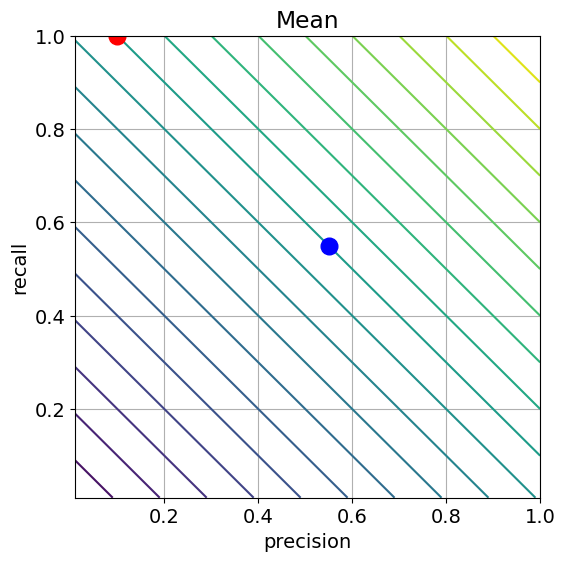

In [10]:
mean_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        mean_levels[i, j] = 1/2 * (precisions[i, j] + recalls[i, j])
        
plt.figure(figsize=(6, 6))
plt.title('Mean')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, mean_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12);

Красной и синей точкой отобразим разные теоретические модели:
- Красная - precision 0.1, recall 1
- Синия - precision 0.55, recall 0.55

|  <empty>   | red | blue |
--- | --- | ---
| precision  |   0.1    |   0.55   |
| recall |   1    |   0.55   |
| **mean** |   **0.55**    |   **0.55**   |

С совершенно разными показателями метрик precision и recall две модели дают одинаковую объединенную метрику, равную 0.55, но говорить о равенстве двух моделей не можем, т.к. они совершают разные ошибки и в разном количестве, у одной идеальный recall, но маленький precision, а у другой - обе метрики на среднем уровне.

### Минимальное значение

Раз мы хотим обе метрики держать на должном уровне, то давайте их объединенной метрикой считать минимальное значение из двух метрик:

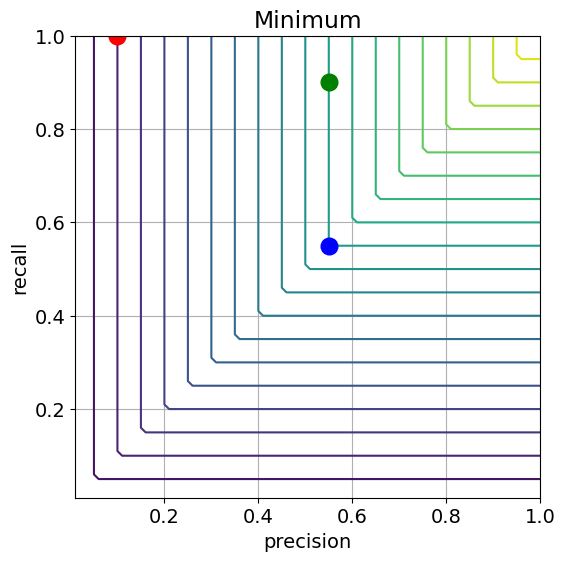

In [11]:
min_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        min_levels[i, j] = min([precisions[i, j], recalls[i, j]])
        
plt.figure(figsize=(6, 6))
plt.title('Minimum')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, min_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12)
plt.plot(0.55, 0.9, 'go', ms=12);

Так же отрисуем две точки - красную и синюю, теперь они находятся на разных линиях уровня, теперь очевидно, что красная модель хуже, чем синяя модель, раз её линия уровня проходит ближе к нулям.

Но добавим ещё одну теоретическую модель:
- Зеленая - precision 0.55, recall 0.9




|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.55   | 0.55|
| recall |   1    |   0.55   | 0.9 |
| **min** |   **0.1**   |   **0.55**   | **0.55**|


Теперь по этой усредненной метрике "взять минимум из двух" мы получили две одинаковые модели, но с разными метриками precision и recall, у синей посредственные precision и recall, поэтому и объединенная получилась небольшая, зато у зеленой метрика recall очень хорошая - 0.9, но тем не менее по линии уровня она такая же, как и синяя, так что снова мы не можем говорить о равенстве двух моделей по данной метрике.

### Гармоническое среднее

И наконец-то возьмем не просто среднее двух метрик, а их гармоническое среднее:

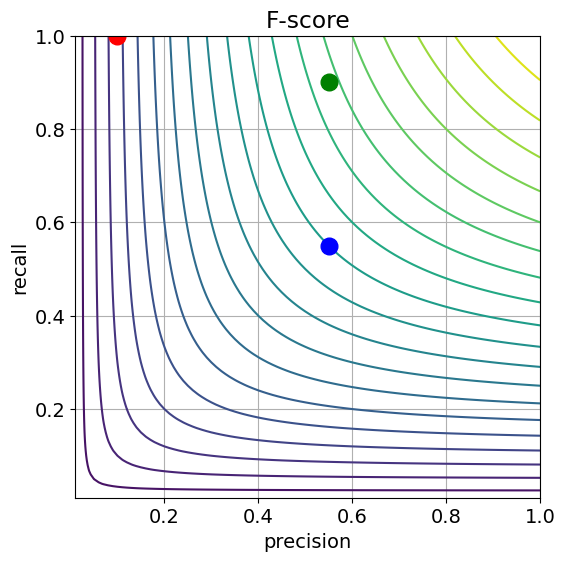

In [12]:
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = 2 * precisions[i, j] * recalls[i, j] / (precisions[i, j] + recalls[i, j])

plt.figure(figsize=(6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20)
plt.plot(0.1, 1, 'ro', ms=12)
plt.plot(0.55, 0.55, 'bo', ms=12)
plt.plot(0.55, 0.9, 'go', ms=12);

Теперь наконец-то наши модели с разными метриками полноты и точности дают разные объединенные показатели. Самая лучшая модель по гармоническому среднему - зеленая, с неплохой точностью и хорошей полнотой.

|  <empty>   | red | blue | green|
--- | --- | --- |---
| precision  |   0.1    |   0.55   | 0.55|
| recall |   1    |   0.55   | 0.9 |
| **f-score** |   **0.1818**   |   **0.55**   | **0.683**|

То, что сейчас посчитали называется гармоническим среднем и метрикой F1-score.

<table>

<tr>
<td>
Метрика
</td>

<td>
Формула
</td>

<td>
Диапазоны значений
</td>

<td>
Идеальное значение
</td>
</tr>

<tr>
<td>
F1-мера
</td>

<td>

$$F_{1} = \frac{2 \cdot precision \cdot recall}{precision + recall}$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>


<table>

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F1-мера является сглаженной версией минимума из точности и полноты.

Подсчитав метрику f1-score, которая из себя представляет гармоническое среднее, мы получили, что первая модель лучше, т.к. все метрики у неё повыше, нежели у второй модели.

В **sklearn** есть функция для подсчета f-меры - **f1_score**.

In [18]:
from sklearn.metrics import f1_score

f1_1 = f1_score(df['clients'], df['first_model'])
f1_2 = f1_score(df['clients'], df['second_model'])

print(f'FIRST MODEL. precision {precision_1}, recall {recall_1}, f1 {f1_1:.2f}')
print(f'SECOND MODEL. precision {precision_2}, recall {recall_2}, f1 {f1_2:.2f}')

FIRST MODEL. precision 0.625, recall 1.0, f1 0.77
SECOND MODEL. precision 1.0, recall 0.4, f1 0.57


Подсчитав метрику f1-score, которая из себя представляет гармоническое среднее, мы получили, что первая модель лучше, т.к. все метрики у неё повыше, нежели у второй модели.

Тем самым получили метрику, которая будет стараться максимизировать precision, которая минимизирует *ложные срабатывания* **False Positive** и recall, которая в свою очередь минизирует *ложные пропуски* **False Negative**.

## $F_{\beta}$ - score

Существует также усовершенствованная версия F-меры $F_{\beta}$:

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

Параметр $\beta$ здесь определяет вес точности в метрике. Его изменение требуется, когда необходимо отдать приоритет точности или полноте, если того требует задача (примеры с АЭС и диагностикой заболевания). 
- При $\beta = 1$ это среднее гармоническое, умноженное на 2 (чтобы в случае $precision = 1$ и $recall = 1$ $F_{1} = 1$)
- Когда $\beta < 1$, то важнее точность
- Когда $\beta > 1$, то важнее полнота

### $\beta < 1$

Возьмем $\beta = 0.25$, чтобы продемонстрировать, как будут изменяться линии уровня.

In [19]:
beta = 0.25

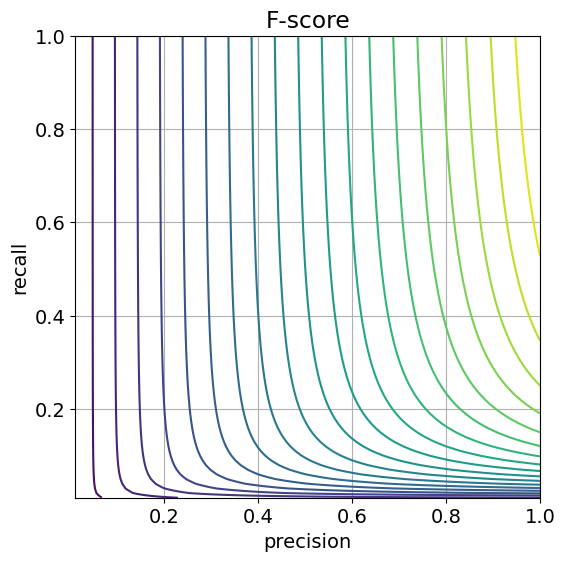

In [20]:
def f_beta_score(pr, rec, beta=1):
    return (1 + beta ** 2) * pr * rec / (beta ** 2 * pr + rec)

f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = f_beta_score(precisions[i, j], recalls[i, j], beta=beta)

plt.figure(figsize=(6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20);

Линии уровня очень сместились в нижний правый угол, значит, что изменения в recall не так заметны, как изменения в precision.

У нас может быть идеальный recall, но если precision посредственный, то и метрика f-score с $\beta < 1$, тоже будет на этом же посредственном уровне, при этом метрика f1 score будет выше.

In [21]:
pr = 0.5
rec = 1

f_beta = f_beta_score(pr=pr, rec=rec, beta=beta)
f_1 = f_beta_score(pr=pr, rec=rec, beta=1)

print(f'Precision {pr}, Recall {rec}')
print(f'F1-мера {f_1:.2f}, F{beta}-мера {f_beta:.2f}')

Precision 0.5, Recall 1
F1-мера 0.67, F0.25-мера 0.52


Но стоит поувеличивать precision, как и вся f-мера станет лучше, даже если при этом будем уменьшать recall.

F1-Мера увеличилась незначительно, а вот f-score с $\beta = 0.25$ - внушительно.

In [22]:
pr = 0.8
rec = 0.6

f_beta = f_beta_score(pr=pr, rec=rec, beta=beta)
f_1 = f_beta_score(pr=pr, rec=rec, beta=1)

print(f'Precision {pr}, Recall {rec}')
print(f'F1-мера {f_1:.2f}, F{beta}-мера {f_beta:.2f}')

Precision 0.8, Recall 0.6
F1-мера 0.69, F0.25-мера 0.78


$$F_{0} = precision$$

При этом если взять $\beta = 0$, то будет учитываться только precision.

$$F_{0} = (1 + 0^{2}) \frac{precision \cdot recall}{0^{2} \cdot precision + recall} = \frac{precision \cdot recall}{recall} = precision$$

In [23]:
beta = 0

f_beta = f_beta_score(pr=pr, rec=rec, beta=beta)

print(f'Precision {pr}, Recall {rec}')
print(f'F{beta}-мера {f_beta:.2f}')

Precision 0.8, Recall 0.6
F0-мера 0.80


А теперь возьмем $\beta = 1.5$, чтобы посмотреть, как в этом случае поведут себя линии уровня.

In [25]:
beta = 1.5

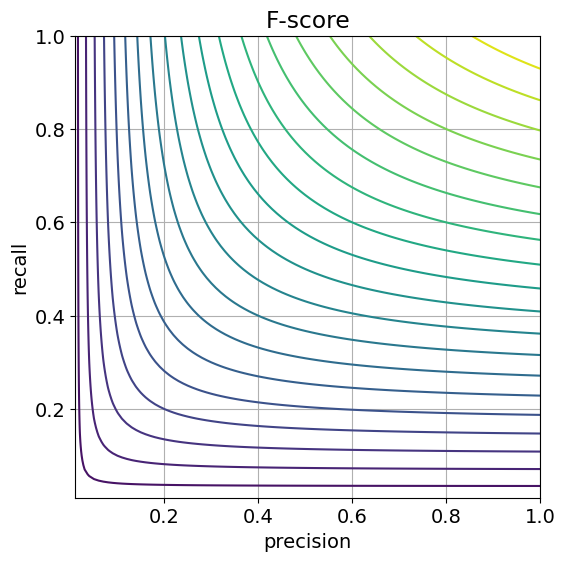

In [26]:
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = f_beta_score(precisions[i, j], recalls[i, j], beta=beta)

plt.figure(figsize=(6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels=20);

Линии уровня очень сместились в верхний левый угол, значит, что изменения в precision не так важны, как изменения в recall, ситуация полностью поменялась.

У нас может быть идеальный precision, но если recall маленький, то и метрика f-score с $\beta > 1$, тоже будет не слишком большой..

In [27]:
pr = 0.9
rec = 0.4

f_beta = f_beta_score(pr=pr, rec=rec, beta=beta)
f_1 = f_beta_score(pr=pr, rec=rec, beta=1)

print(f'Precision {pr}, Recall {rec}')
print(f'F1-мера {f_1:.2f}, F{beta}-мера {f_beta:.2f}')

Precision 0.9, Recall 0.4
F1-мера 0.55, F1.5-мера 0.48


Но если улучшить recall, то и f-мера станет выше, даже если при этом будем уменьшать precision.

F1-Мера увеличилась незначительно, а вот f-score с $\beta = 1.5$ - очень заметно.

In [28]:
pr = 0.6
rec = 0.9

f_beta = f_beta_score(pr=pr, rec=rec, beta=beta)
f_1 = f_beta_score(pr=pr, rec=rec, beta=1)

print(f'Precision {pr}, Recall {rec}')
print(f'F1-мера {f_1:.2f}, F{beta}-мера {f_beta:.2f}')

Precision 0.6, Recall 0.9
F1-мера 0.72, F1.5-мера 0.78


При этом если взять $\beta -> +\infty$, то будет учитываться только recall.

In [30]:
beta = 100

f_beta = f_beta_score(pr=pr, rec=rec, beta=beta)

print(f'Precision {pr}, Recall {rec}')
print(f'F{beta}-мера {f_beta:.2f}')

Precision 0.6, Recall 0.9
F100-мера 0.90


Вот таким образом, изменяя показатель коэффициента $\beta$ в подсчете f-score, мы можем изменять важность каждой метрики.

В sklearn есть функция для подсчета таких f-мер - fbeta_score, где в аргумент beta можно передавать коэффициент  β , который подходит для вашей задачи.

In [32]:
from sklearn.metrics import fbeta_score

fbeta_score(df['clients'], df['first_model'], beta=1)

0.7692307692307693

In [33]:
fbeta_score(df['clients'], df['first_model'], beta=1.5)

0.8441558441558441

In [34]:
fbeta_score(df['clients'], df['first_model'], beta=0.5)

0.6756756756756757

Все три метрики можно вывести с помощью функции `classification_report` из `sklearn`.

In [35]:
from sklearn.metrics import classification_report

print(classification_report(df['clients'], df['first_model']))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



Смотрим метрики для 1 класс, т.к. мы его выбрали как целевой. Precision 0.62, Recall 1, F-score 0.77, как и у нас. А ниже выводятся усреднения метрик: micro, macro и weighted.